**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: Karen Lizette Rodríguez Hernández
*   MATRÍCULA: A01197734

*   NOMBRE: Marcelo Ismael López Verdugo
*   MATRÍCULA: A00959089

*   NOMBRE: Angel García Ortega
*   MATRÍCULA: A01796653

*   NOMBRE: Juan Carlos Garcés Carrillo
*   MATRÍCULA: A01796283

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DIR = "/content/drive/MyDrive/MNA/1-Trimestre/CienciaDatos/Equipo 29/Semana 8"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Estadísticas descriptivas de variables numéricas
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Estadísticas descriptivas de variables categóricas
insurance_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [ ]:
# Valores faltantes
insurance_df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


No hay valores faltantes en ninguna columna. Esta información se puede validar obervando la fila de `count` en las estadísticas descriptivas de cada variable, o utilizando el método `isna()`

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

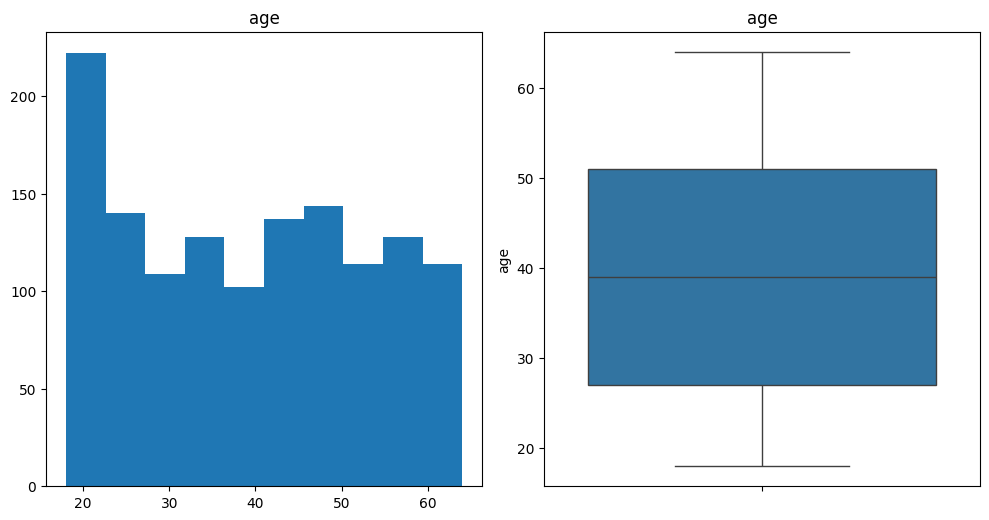

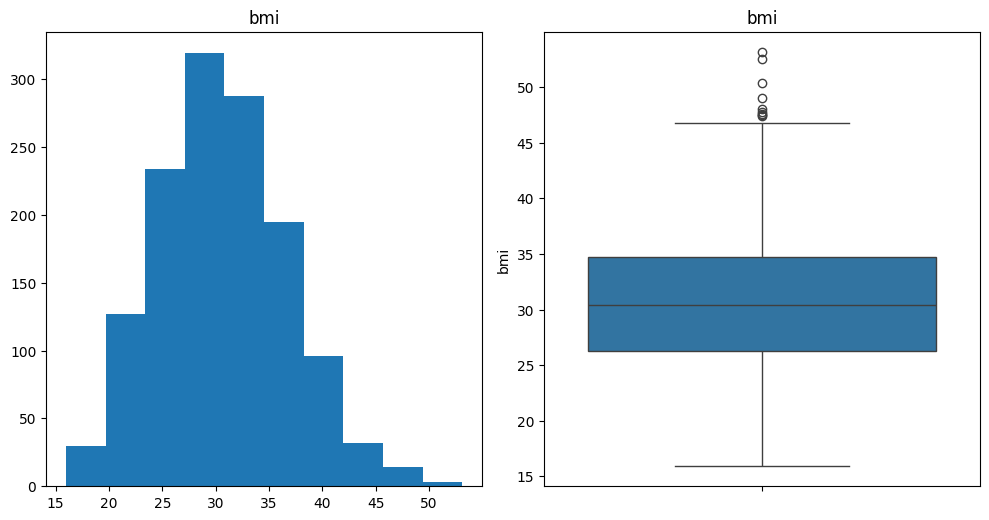

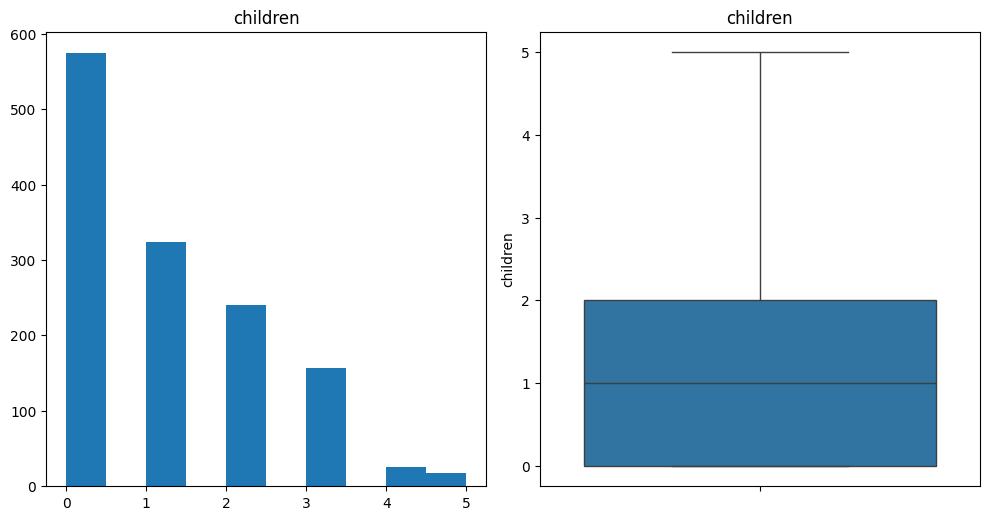

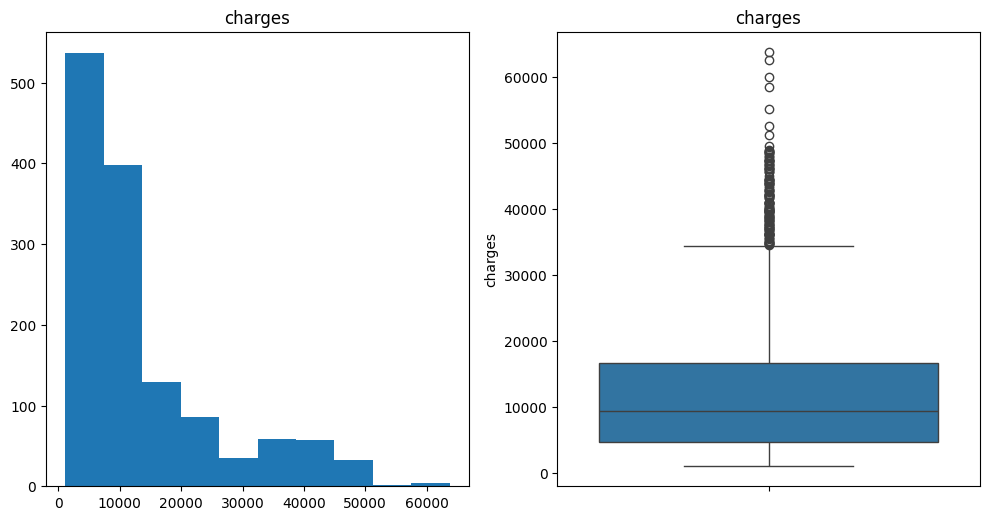

In [ ]:
# Histogramas y boxplots para variables cuantitativas
for col in ['age', 'bmi', 'children', 'charges']:
  plt.figure(figsize=(10,10))
  plt.subplot(2,2,1)
  plt.hist(insurance_df[col])
  plt.title(col)
  plt.subplot(2,2,2)
  sns.boxplot(insurance_df, y=col)
  plt.title(col)
  plt.tight_layout()
  plt.show()

<Axes: xlabel='region'>

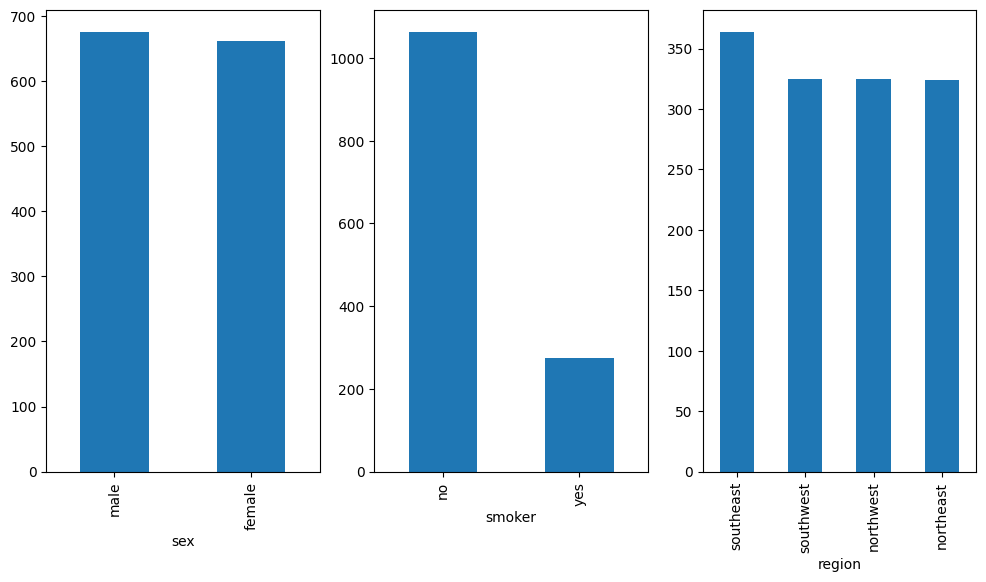

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
insurance_df['sex'].value_counts().plot(kind='bar')
plt.subplot(1,3,2)
insurance_df['smoker'].value_counts().plot(kind='bar')
plt.subplot(1,3,3)
insurance_df['region'].value_counts().plot(kind='bar')

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

<Axes: xlabel='sex', ylabel='charges'>

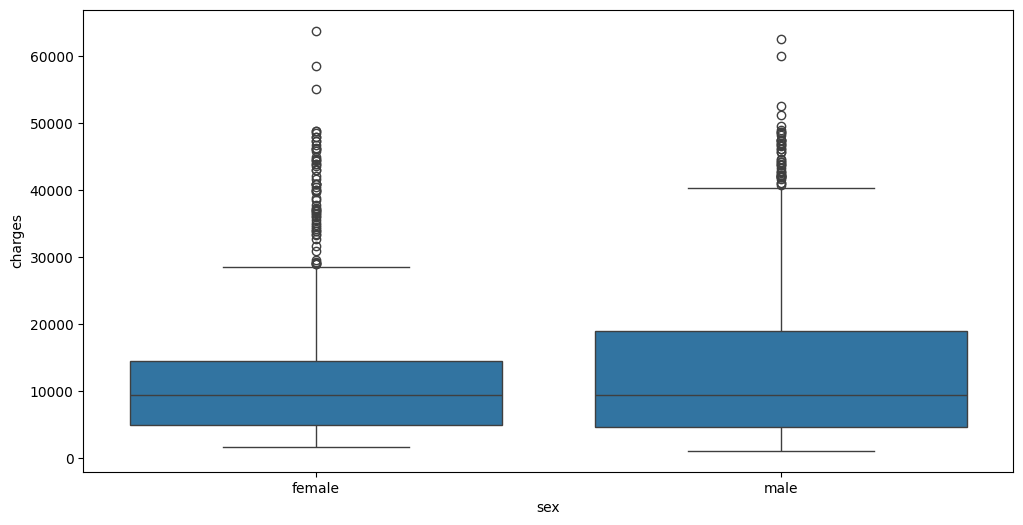

In [ ]:
# Distribución de charges dependiendo del sexo
plt.figure(figsize=(12,6))
sns.boxplot(insurance_df, x='sex', y='charges')

Los cuartiles que sufren un cambio es el tercero y cuarto, sin embargo, **no existe una diferencia significativa**, ya que en ambos sexos la mediana es la misma.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

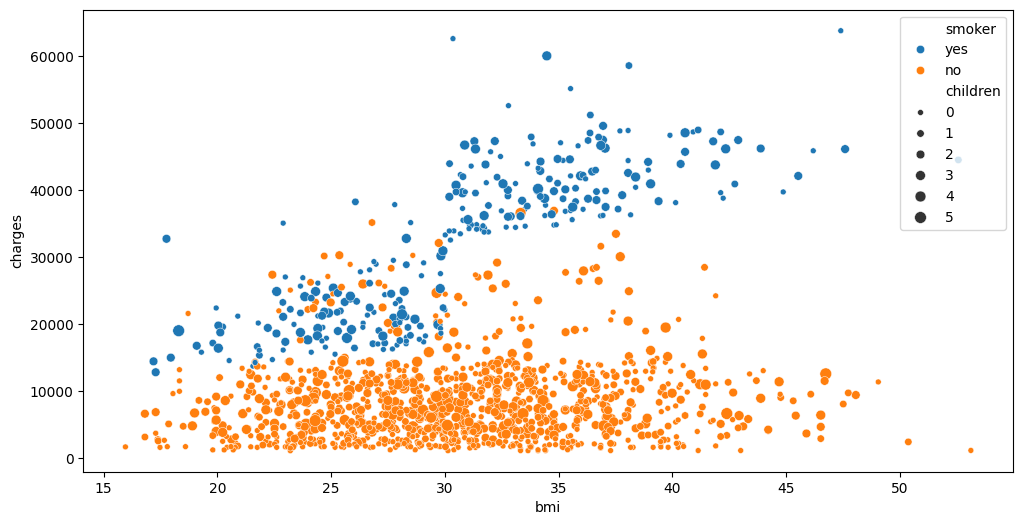

In [ ]:
# Diagrama de dispersión de charges vs bmi
plt.figure(figsize=(12,6))
sns.scatterplot(insurance_df, x='bmi', y='charges', hue='smoker', size='children')
plt.legend(loc='upper right')

Las personas que son fumadores tienen una mayor prima (número más alto en la variable `charges`) que las personas que no son fumadoras. No se observa una relación significativa con el número de hijos.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<Axes: >

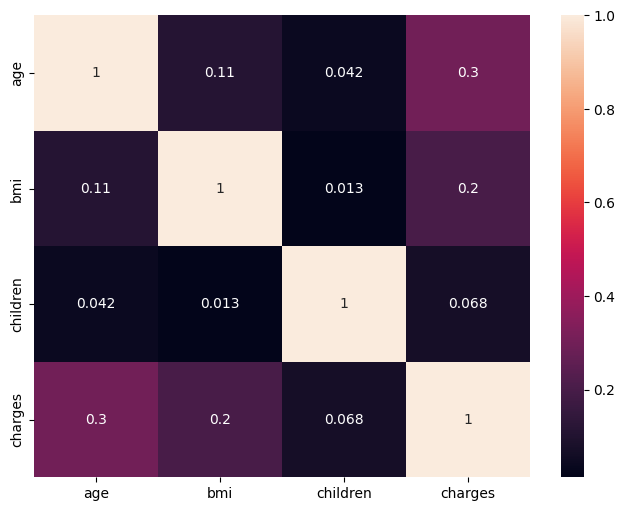

In [ ]:
# Mapa de calor de la correlación de las variables numéricas
insurance_df_num = insurance_df.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(insurance_df_num.corr(), annot=True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [ ]:
# Dataframe con valores atípicos en charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outliers = insurance_df[(insurance_df['charges'] < Q1 - 1.5 * IQR) | (insurance_df['charges'] > Q3 + 1.5 * IQR)]
outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [ ]:
# Promedio de age y bmi
print('Promedio de age:', outliers['age'].mean())
print('Promedio de bmi:', outliers['bmi'].mean())

Promedio de age: 41.07913669064748
Promedio de bmi: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [ ]:
# Porcentaje por sexo
print('Porcentaje por sexo:')
outliers['sex'].value_counts(normalize=True) * 100

Porcentaje por sexo:


,proportion
sex,
male,64.028777
female,35.971223


In [ ]:
# Porcentaje por fumadores
print('Porcentaje por fumadores:')
outliers['smoker'].value_counts(normalize=True) * 100

Porcentaje por fumadores:


,proportion
smoker,
yes,97.841727
no,2.158273


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [ ]:
# Separación de variables
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [ ]:
# Dividir el conjunto en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1, stratify=X['smoker'])

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [ ]:
# Generar un transformador para aplicar MinMax y One-Hot Encoding
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ('num', MinMaxScaler(), ['age', 'bmi', 'children']),
    ('cat', OneHotEncoder(drop='first'), ['sex', 'smoker', 'region'])
])

# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [ ]:
# Ejecutar pipeline y algoritmo de regresión lineal
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ('preprocessing', preprocessing),
    ('lr', LinearRegression())
])

In [ ]:
# Evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score
import math

lr_model.fit(Xtrain, ytrain)
ypred = lr_model.predict(Xtest)
rmse = math.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)

print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 5698.759784532356
R^2: 0.7538547215244324


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [ ]:
# Reemplazar los outliers de charges con el limite superior
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1
outlier_values = outliers['charges']
ytrain.loc[ytrain.isin(outlier_values)] = Q3 + 1.5 * IQR
ytest.loc[ytest.isin(outlier_values)] = Q3 + 1.5 * IQR

In [ ]:
# Ejecutar pipeline y algoritmo de regresión lineal
lr_model2 = Pipeline([
    ('preprocessing', preprocessing),
    ('lr', LinearRegression())
])

In [ ]:
# Evaluar el modelo
lr_model2.fit(Xtrain, ytrain)
ypred = lr_model2.predict(Xtest)
rmse = math.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)

print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 4812.06172831982
R^2: 0.7637776364359082


El valor de RMSE disminuyo, y el valor de R^2 aumento lo que se acerca a un poco más a un modelo de predicción perfecto.

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [ ]:
# Generar un transformador con escalamiento estándar y codificación ordinal
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

preprocessing2 = ColumnTransformer([
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OrdinalEncoder(), ['sex', 'smoker', 'region'])
])

In [ ]:
# Pipeline utilizando nuevo transformador
lr_model3 = Pipeline([
    ('preprocessing', preprocessing2),
    ('lr', LinearRegression())
])

In [ ]:
# Evaluar el modelo
lr_model3.fit(Xtrain, ytrain)
ypred = lr_model3.predict(Xtest)
rmse = math.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)

print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 4811.600670456455
R^2: 0.7638229005936741


Disminuyo aún más el valor de RMSE y aumento el valor de R^2

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [ ]:
# Regresión polinomial
from sklearn.preprocessing import PolynomialFeatures

lr_model4 = Pipeline([
    ('preprocessing', preprocessing2),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

In [ ]:
# Evaluar el modelo
lr_model4.fit(Xtrain, ytrain)
ypred = lr_model4.predict(Xtest)
rmse = math.sqrt(mean_squared_error(ytest, ypred))
r2 = r2_score(ytest, ypred)

print('RMSE:', rmse)
print('R^2:', r2)

RMSE: 4285.570310965559
R^2: 0.8126404302016095
